# Tema 1. Variables aleatorias multivariadas.
## 1.1. Correlaciones y covarianzas.

<p align="right">
Autor: Emmanuel Alcalá
<br>
<a href="https://scholar.google.com.mx/citations?hl=en&user=3URusCgAAAAJ&view_op=list_works&sortby=pubdate">Google Scholar</a>
</p>

<p align="left">
<br>
<a href="https://jealcalat.github.io/Analisis_multivariado/">Regresar a la página del curso</a>
</p>

---

### 0. Preliminares

Para las primeras lecciones, los siguientes temas de álgebra lineal son necesarios para comprender algunos conceptos.

**Producto punto (o producto interno)**

Dados dos vectores columna $\mathbf{a} = [a_1, a_2, \dots , a_n]^\top$ y $\mathbf{b} = [b_1, b_2, \dots , b_n]^\top$, el producto punto de ambos vectores es definido como

$$
\mathbf{a}^\top \mathbf{b} =%
\begin{bmatrix}
  a_1 & a_2 & \dots & a_n
\end{bmatrix} \begin{bmatrix}
  b_1 \\
  b_2 \\
  \vdots \\
  b_n
\end{bmatrix} =%
\sum_{i=1}^n a_ib_i = a_1b_1 + a_2b_2 + \dots + a_nb_n
$$

Por ejemplo, si $\mathbf{a}$ es un vector de probabilidades $p_i = 1/n$ y $\mathbf{b}$ una variable aleatoria $x$, el producto punto $\mathbf{p}^\top \mathbf{x}$ es el promedio 

$$
\mathbf{p}^\top \mathbf{x} = \sum_{i=1}^n \frac{1}{n} x_i = \frac{1}{n} \sum_{i=1}^n x_i
$$

**Producto de dos matrices**

Dadas dos matrices $\mathbf{A} \in \mathbb{R}^{m \times n},\ \mathbf{B} \in \mathbb{R}^{n\times k}$

$$
  \mathbf{A} = %
  \begin{bmatrix}
    a_{11} & a_{12} & \dots & a_{1n}\\
    a_{21} & a_{22} & \dots & a_{2n}\\
    \vdots & \vdots &       & \vdots\\
    a_{m1} & a_{m2} & \dots & a_{mn}
  \end{bmatrix} \quad
  \mathbf{B} = %
  \begin{bmatrix}
    b_{11} & b_{12} & \dots & b_{1k}\\
    b_{21} & b_{22} & \dots & b_{2k}\\
    \vdots & \vdots &       & \vdots\\
    b_{n1} & b_{n2} & \dots & b_{nk}
  \end{bmatrix}
$$

su producto es

$$
  \mathbf{A}\mathbf{B} = \mathbf{C} = %
  \begin{bmatrix}
    c_{11} & c_{12} & \dots & c_{1k}\\
    c_{21} & c_{22} & \dots & c_{2k}\\
    \vdots & \vdots &       & \vdots\\
    c_{m1} & c_{m2} & \dots & c_{mk}
  \end{bmatrix}
$$

En donde cada elemento de $\mathbf{C}$ se denota como $c_{ij}$ con $m$-filas y $k$-columnas. 

**Nota**: Cuando se escribe $\mathbf{A} \in \mathbb{R}^{m \times n}$, en notación matricial el primer sobreíndice, en este caso $m$, hace referencia a las filas, y el segundo, $n$, hace referencia a las columnas. Lo mismo cuando se indiza. En $c_{ij}$ $i$ indica la $i$-ésima fila y $j$ la $j$-ésima columna. Este orden se conserva en `R` cuando se indizan elementos de objetos. Por ejemplo, `m[1, 1]` retorna el valor de la primera fila, primera columna.

Cada entrada $c_{ij}$ se computa como

$$
  c_{ij} = \sum_{l=1}^n a_{il}b_{lj},\quad i=1,\dots, m,\quad j=1,\dots,k,\quad l=1,\dots,n
$$

$\mathbf{A}$ tiene $n$ columnas, $\mathbf{B}$ tiene $n$ filas, $l$ indiza las columnas de $\mathbf{A}$ y las filas de $\mathbf{B}$. Debe notarse que $c_{ij}$ es un producto punto: el de una fila de $\mathbf{A}$ con una columna de $\mathbf{B}$

$$
  \begin{bmatrix}
    \color{red}a_{11} & \color{red}a_{12} & \color{red}a_{13}\\
    \color{green}a_{21} & \color{green}a_{22} & \color{green}a_{23}
  \end{bmatrix}
  \begin{bmatrix}
    \color{red}b_{11} & \color{green}b_{12}\\
    \color{red}b_{21} & \color{green}b_{22}\\
    \color{red}b_{31} & \color{green}b_{32}
  \end{bmatrix} =  %
    \begin{bmatrix}
    \underbrace{\color{red}a_{11}b_{11} + a_{12}b_{21} + a_{13}b_{31}}_{c_{11}} & %
    \underbrace{{\color{red}a_{11}}{\color{green}b_{12}} + {\color{red}a_{12}}{\color{green}b_{22}} + {\color{red}a_{13}}{\color{green}b_{32}}}_{c_{12}}\\
    \underbrace{{\color{green}a_{21}}{\color{red}b_{11}} + {\color{green}a_{22}}{\color{red}b_{21}} + {\color{green}a_{13}}\color{red}{b_{31}}}_{c_{21}} & %
    \underbrace{\color{green}a_{21}b_{12} + a_{22}b_{22} + a_{23}b_{32}}_{c_{22}}
  \end{bmatrix} = %
  \begin{bmatrix}
    c_{11} & c_{12}\\
    c_{21} & c_{22}
  \end{bmatrix} \in \mathbb{R}^{2\times 2}
$$

$c_{11}$ es producto punto de la primera fila de $\mathbf{A}$ ($i=1$) con la primera columna de $\mathbf{B}$ ($j=1$), con $j=i=1$ e iterando sobre $l=1, 2, 3$

$$
\sum_{l=1}^{n=3}a_{1l}b_{l1} = a_{11}b_{11} + a_{12}b_{21} + a_{13}b_{31}
$$

**Nota**: Las matrices *solo* pueden ser multiplicadas si sus dimensiones 'vecinas' coinciden: 

$$
  \underbrace{\mathbf{A}}_{m\times n}\underbrace{\mathbf{B}}_{n\times k} = \underbrace{\mathbf{C}}_{m\times k}
$$

Como se ilustró antes, para poder multiplicar $\mathbf{A}$ con $\mathbf{B}$, las columnas del primero coinciden con las filas del segundo, 2 y 2 respectivamente. El resultado es una matriz con $m\times k$ filas y columnas. 

---

En `R` el producto punto se obtiene con el comando `%*%`. Por ejemplo, para calcular el producto punto $\mathbf{a}^\top \mathbf{b}$ se obtiene como `a %*% b`, lo que es equivalente a `sum(a * b)`.

La multiplicación de matrices también se obtiene con `%*%`. Así, $\mathbf{A}\mathbf{B}$ se obtiene `A %*% B`.

In [53]:
# ejemplo de producto punto
# vector de resultados
x <- c(10, 5, 6)
# vector de probabilidades
px <- rep(1 / length(x), length(x))
# imprimir resultados
cat(
  "  mean_dot = ",
  x %*% px,
    "\n",
  "   by def = ",
  sum(px * x),
  "\n",
  "mean_base = ",
  mean(x)
)

  mean_dot =  7 
    by def =  7 
 mean_base =  7

In [12]:
## producto de matrices
A <- matrix(
  c(
    10, 8,
    5, 12
  ),
  ncol = 2,
  byrow = TRUE
)

B <- matrix(
  c(
    5, 3,
    15, 6
  ),
  ncol = 2, byrow = TRUE
)
## Dadas las anteriores matrices, las siguientes operaciones son equivalentes
# A %*% B
A %*% B
# desarrollada
matrix(
  c(
    A[1,1] * B[1,1] + A[1,2] * B[2,1], A[1,1] * B[1,2] + A[1,2] * B[2,2],
    A[2,1] * B[1,1] + A[2,2] * B[2,1], A[2,1] * B[1,2] + A[2,2] * B[2,2]
  ),
  ncol = 2, byrow = TRUE
)
# usando producto punto por i,j
matrix(
  c(
    A[1, ] %*% B[ ,1], A[1, ] %*% B[ ,2],
    A[2, ] %*% B[ ,1], A[2, ] %*% B[ ,2]
  ),
  ncol = 2, byrow = TRUE
)


170,78
205,87


170,78
205,87


170,78
205,87


**1.1.1. Covarianza univariada**

El valor esperado, o media o primer momento, de la variable aleatoria $X$ es

$$
\begin{equation*}
  \mathbb{E}_X{x} = \begin{cases}
    \sum_x xf(x) &\text{ si $X$ es discreta}\\
    \int x f(x) \text{d}x &\text{ si $X$ es continua}
  \end{cases}\tag{1}
\end{equation*}
$$

Si el contexto no es ambiguo, se escribe simplemente $\mathbb{E}[x]$. $f(x)$ es una distribución de probabilidad. Se puede pensar en $\mathbb{E}[x]$ como un promedio de muestras $X_1, ..., X_n$, con $f(x) = 1/n$

$$
\begin{equation*}
  \mathbb{E}[x] \approx \frac{1}{n}\sum_{i=1}^n X_i \tag{2}
\end{equation*}
$$

La covarianza es una medida de dependencia entre dos variables aleatorias. Dadas dos variables univariadas $X, Y \in \mathbb{R}$, con realizaciones $x, y$, la covarianza es definida como el producto esperado de sus desviaciones con respecto a sus medias:

$$
\begin{equation*}
\text{Cov}_{X,Y}[x, y] := \mathbb{E}_{X,Y}\left [(x - \mathbb{E}_X[x])(y - \mathbb{E}_Y[y]) \right] \tag{3}
\end{equation*}
$$

en donde $\mathbb{E}_X[x], \mathbb{E}_Y[y]$ es la media de $x$ y $y$ respectivamente. Notar que $\text{Cov}_{X,Y}[x, y]$ se puede escribir como

$$
\begin{equation*}
  \text{Cov}_{X,Y}[x, y] = \sum_{x,y}f(x,y)(x - \mathbb{E}[x])(y - \mathbb{E}[y])
\end{equation*} \tag{4}
$$

Si $(x, y)$ tienen iguales probabilidades $1/n$, entonces la covarianza es

$$
\begin{equation*}
  \text{Cov}_{X,Y}[x, y] = \frac{1}{n} \sum_{x,y}(x - \mathbb{E}[x])(y - \mathbb{E}[y])\tag{5}
\end{equation*}
$$

Si denotamos $x_0 = (x - \mathbb{E}[x])$ y  $y_0 = (y - \mathbb{E}[y])$ como como $x$ centrada y $y$ centradas con respecto a su media, la covarianza es 

$$
\begin{equation*}
  \text{Cov}_{X,Y}[x, y] = \frac{1}{n} \mathbf{x}_0^\top \mathbf{y}_0\tag{6}
\end{equation*}
$$

En donde $\mathbf{x}_0^\top \mathbf{y}_0$ es el producto punto de los vectores centrados. 

### 1.1.2. Correlación univariada

Comenzamos por encontrar el ángulo $\theta$ entre los vectores centrados $\mathbf{x}_0, \mathbf{y}_0$, para lo cual usamos la definición 

$$
\begin{align*}
 \mathbf{x}_0^\top \mathbf{y}_0 &= \| \mathbf{x}_0 \| \|  \mathbf{y}_0 \| \cos \theta\\
 \cos \theta  &=  \frac{\mathbf{x}_0^\top \mathbf{y}_0}{ \|\mathbf{x}_0\| \|\mathbf{y}_0\|}
\end{align*} \tag{7}
$$

En donde $\| \mathbf{x_0} \|$ es llamada norma $L^2$, que no es otra cosa que la distancia euclidiana de un vector con respecto a su origen. Su definición es la raíz cuadrada del producto punto de un vector consigo mismo:

$$
\begin{align*}
  \| \mathbf{x}_0 \| = \sqrt{\mathbf{x}_0^\top \mathbf{x}_0} = \sqrt{x_0(1)^2 + x_0(2)^2 + \dots  } \tag{8}
\end{align*}
$$

Notar lo siguiente: la definición de la varianza es el valor esperado de las desviaciones cuadradas de $x$ con respecto a su media, $x - \mathbb{E}[x]$

$$
\begin{align*}
\text{Var}[x] &= \mathbb{E}[(x - \mathbb{E}[x])^2] = \frac{1}{n}\sum_{X} (x - \mathbb{E}[x])^2\\
\text{Var}[x] &= \frac{1}{n}\sum_{X} x_0^2 = \frac{1}{n}\mathbf{x}_0^\top \mathbf{x}_0 \tag{9}
\end{align*}
$$

Dado que la desviación estándar es $\text{SD}[x] = \sqrt{\text{Var}[x]}$, combinando $(8)$ y $(9)$ tenemos lo siguiente:

$$
\begin{equation*}
\text{SD}[x] = \sqrt{\text{Var}[x]} = \sqrt{\frac{1}{n}\sum_{X} x_0^2} = \sqrt{1/n}\| \mathbf{x}_0 \| \tag{10}
\end{equation*}
$$

Si dividimos $\text{Cov}[x, y]$ entre el producto de las desviaciones de $x$ y $y$, $\text{SD}[x] \cdot \text{SD}[y] $ tenemos 

$$
\frac{\frac{1}{n} \mathbf{x}_0^\top \mathbf{y}_0}{\sqrt{1/n}\| \mathbf{x}_0 \| \sqrt{1/n}\| \mathbf{y}_0 \| } 
$$

A la cantidad que resulta se le conoce como coeficiente de correlación, $\rho$. Notar que, reacomodando ($\sqrt{1/n} \times \sqrt{1/n} = 1/n$), $\rho$ es el coseno de similitud definido en $(7)$

$$
  \begin{align*}
    \rho = \cos \theta &= \frac{\frac{1}{n} \mathbf{x}_0^\top \mathbf{y}_0}{\sqrt{1/n}\| \mathbf{x}_0 \| \sqrt{1/n}\| \mathbf{y}_0 \| }\\
      &= \frac{\mathbf{x}_0^\top \mathbf{y}_0}{\| \mathbf{x}_0 \| \| \mathbf{y}_0 \| }
  \end{align*}\tag{11}
$$

Esta forma de definirlo tiene propiedades interesantes. Por álgebra lineal, sabemos que si dos vectores $\mathbf{a}, \mathbf{b}$ son ortogonales (i.e., $\theta = 90^\circ$) su producto punto $\mathbf{a}^\top \mathbf{b} = 0$, y por lo tanto son linealmente independientes. Si dos vectores centrados son ortogonales, $\mathbf{x}_0^\top \mathbf{y}_0 = 0$ y por lo tanto $\rho = 0$. Es decir, $\rho = 0$ indica que existe independencia lineal entre los vectores.

Otra observación interesante es la siguiente. Definamos la estandarización de $x$ como la transformación lineal:

$$
  z(x) = \frac{x - \mu}{\text{SD}[x]} = \frac{x_0}{\text{SD}[x]}
$$

Ahora $z(x)$ es una transformación de $x$ que consiste en centrarla y dividirla por su desviación estándar. Por la eq. 11, podemos decir que la correlación $\rho$ es el producto punto de los vectores centrados $\mathbf{x}_0$ y $\mathbf{y}_0$ *divididos* por el producto de las desviaciones estándar, lo que es equivalente a 

$$
  \rho = \frac{x_0}{\text{SD}[x]} \times  \frac{y_0}{\text{SD}[y]} = z(x)\times z(y)
$$

Podemos ver que la eq. 11 es equivalente a la covarianza de las variables estandarizadas.

$$
  \rho = \text{Cov}[z_x, z_y] = \frac{1}{n}\mathbf{z}_x^\top\mathbf{z}_y \tag{12}
$$

---

Propiedades de $\rho$:

1. $-1 \leq \rho \leq 1$.
2. Mide relación (dependencia) lineal.
3. $\rho$ no cambia con transformaciones lineales (suma o multiplicación con mismo signo).

---

A continuación mostraremos algunos de estos importantes resultados usando código de R. Notar que en las definiciones dadas han sido para una población, no para una muestra.

In [33]:
# eq 6: mostrar que la covarianza (x,y) es igual al producto punto de
# los vectores centrados divididos por (n - 1) (por qué?). Usar la función
# cov(x,y) nativa de R.

center <- function(x) x - mean(x)
dot_prod <- function(x, y) x %*% y

cov_dot <- function(x, y) {
  n <- length(x)
  x0 <- center(x)
  y0 <- center(y)
  # dividir por (n-1) porque es la covarianza muestral
  (1 / (n - 1)) * dot_prod(x0, y0) |> as.numeric()
}

set.seed(89)
x <- rnorm(150)
y <- rnorm(150, 5)

cat(
  sprintf(
    "cov_dot_def: %0.6f\n  cov_r_fun: %0.6f",
    cov_dot(x, y),
    cov(x, y)
  )
)

cov_dot_def: 0.009486
  cov_r_fun: 0.009486

In [29]:
# eq 10: mostrar que la desviación estándar de x es la norma de x centrado
# multiplicado por por la raíz del recíproco de (n-1). Usar la función sd(x)
# nativa de R.

# de la definicion

sd_x <- function(x) {
  # centrar x
  x0 <- center(x)
  nsample <- length(x0) - 1
  # obtener la norma
  norm_x0 <- norm(x0, type = "2")
  norm_x0 * sqrt(1 / nsample)
}

set.seed(89)
x <- rnorm(150)

cat(
  sprintf(
    " sd(x)_norm: %0.6f\nsd(x)_r_fun: %0.6f", sd_x(x), sd(x)
  )
)

 sd(x)_norm: 1.042977
sd(x)_r_fun: 1.042977

cos theta: 0.009196
      rho: 0.009196

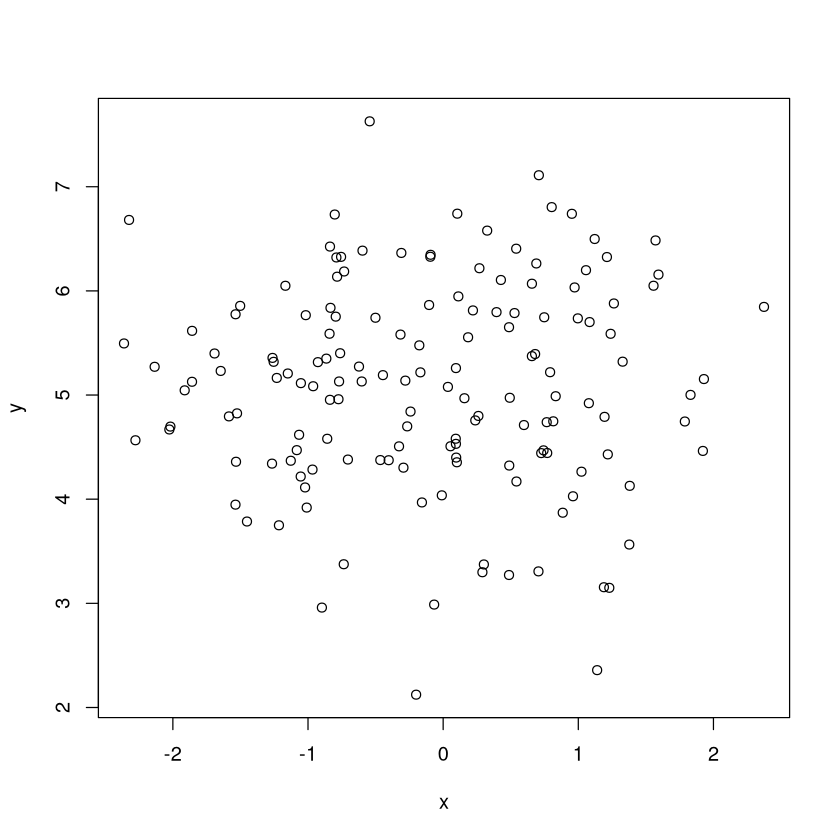

In [25]:
# eq 11: mostrar que el coeficiente de correlación es igual al coseno de similitud
# para los vectores centrados x0, y0. Usar la funcion cor(x,y) nativa de R.

cosine_sim <- function(x, y) {
  # obtener el producto punto
  dot_xy <- dot_prod(x, y)
  # obtener la norma L2
  norm_x <- norm(x, type = "2")
  norm_y <- norm(y, type = "2")
  dot_xy / (norm_x * norm_y) |> as.numeric()
}

set.seed(89)
x <- rnorm(150)
y <- rnorm(150, 5)
plot(x, y)
# centrar vectores
x0 <- center(x)
y0 <- center(y)

# cat(
#   "cos theta = ",
#   cosine_sim(x0, y0) |> round(6),
#   "\n",
#   "     rho = ",
#   cor(x, y) |> round(6)
# )
cat(
  sprintf(
    "cos theta: %0.6f\n      rho: %0.6f", cosine_sim(x0, y0), cor(x, y)
  )
)

In [87]:
# eq 12: mostrar que la correlación es igual a la covarianza de las variables estandarizadas
# nota: en R existe la función scale que centre y escala (divide por SD) las variables,
# pero vamos a hacer la nuestra para ilustrar
z_score <- function(x) {
  (x - mean(x)) / sd(x)
}
set.seed(89)
x <- rnorm(150)
y <- rnorm(150, 5)
# centrar vectores
z_x <- z_score(x)
z_y <- z_score(y)

t(data.frame(
  cor_by_def = (1 / (length(x) - 1)) * z_x %*% z_y,
  cor_r_base = cor(x, y),
  cor_cov_z = cov(z_x, z_y)
)) |> round(6)

cor_by_def,0.009196
cor_r_base,0.009196
cor_cov_z,0.009196


Las propiedades (1) y (2) son fáciles de verificar numéricamente.

[1] "La correlación es de -0.003"


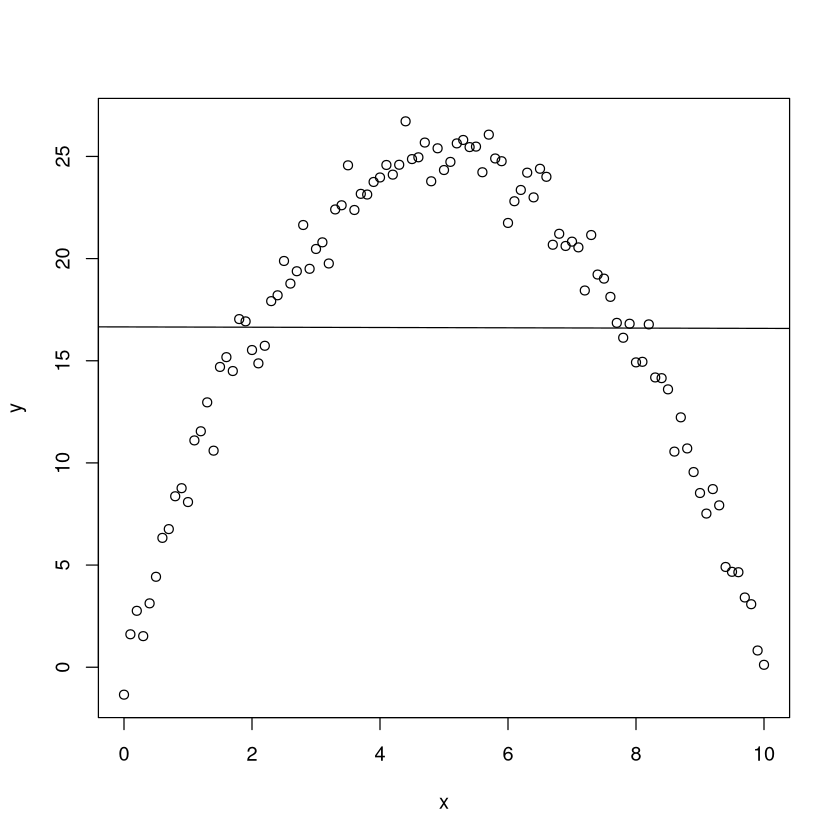

In [34]:
# rho solo mide dependencia lineal, no dependencia en general
fun_quadratic <- function(x) {
  xmax <- max(x)
  x*(xmax - x) + rnorm(length(x), 0, 0.1*xmax)
}
set.seed(456)
x <- seq(0, 10, 0.1)
y <- fun_quadratic(x)
plot(x, y)
abline(lm(y ~ x))
print(
  sprintf(
    'La correlación es de %0.3f', cor(x,y)
  )
)

**Off topic**: si $\rho$ no sirve para medir dependencia no lineal, ¿qué podemos usar?

Para medir dependencia *no lineal* existen alternativas, como la información mutua o la correlación de la distancia.

Para calcular la información mutua instalamos el paquete `infotheo` usando `install.packages('infotheo')`, y para correlación de la distancia instalamos `energy` de la misma manera.

In [36]:
# cargamos los paquetes
library(infotheo)
library(energy)
set.seed(456)
x <- seq(0, 10, 0.1)
y <- fun_quadratic(x)
# crear df para discretizar en bins
df_raw <- data.frame(x = x, y = y)
# cantidad de bines recomendado la raíz cuadrada de N
df_discretized <- discretize(X = df_raw, nbins = sqrt(NROW(df_raw)))
# calcular la información mutua
mut_info <- multiinformation(df_discretized, method = "mm")
# calcular la correlación de la distancia
cor_dist <- dcor(x, y)

cat(
  sprintf(
    "MultInf: %0.3f\nCorDist: %0.3f\nAmbas diferente de 0",
    mut_info, cor_dist
  )
)

MultInf: 1.221
CorDist: 0.488
Ambas diferente de 0

In [45]:
# invariante a transformaciones lineales
x <- seq(0, 10, 0.1)
set.seed(456)
y <- x + rnorm(length(x), 1, 2)
original_rho <- cor(x, y)
# multiplicar x por 2, sumar 3 a y
transformed_rho <- cor(x * 2, y + 3)
cat(
  sprintf(
    " OriginalRho: %0.3f\nLineTransRho: %0.3f",
    original_rho, transformed_rho
  )
)

 OriginalRho: 0.823
LineTransRho: 0.823

### 1.1.2. Covarianza multivariada

#### Datos multivariados

Los datos multivariados surgen cuando, para investigar algún fenóomeno o proceso, se seleccionan $p\geq 1$ *variables* o características para medir. Todos los valores se miden para una misma *unidad observacional* (individuo, objeto, proceso, máquina, etc.). Esas variables son llamadas *dimensiones*.

El análisis multivariado tiene como objeto el análisis y entendimiento de datos en varias dimensiones. Partimos de un arreglo $\textbf{X} \in \mathbb{R}^p$.

Denotamos como $x_{jk}$ a la $k$ variable (columna) medida en la $j$ observación (fila). Cada $x_{j}$ tiene $p$ dimensiones (o variables/columnas). 

$$
\text{tamaño muestral }n
\left\{
\begin{array}{c|cccccc}
& \text{Variable } 1  & \text{Variable } 2  & \dots & \text{Variable } k & \dots  & \text{Variable } p \\ \hline
\text{Ob }1 & {x}_{11} & {x}_{12} & \dots & x_{1k}  & \dots & {x}_{1p} \\
\text{Ob } 2 & {x}_{21} & {x}_{22} & \dots & x_{2k}  & \dots & {x}_{2p}\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
\text{Ob } j & {x}_{j1} & {x}_{j2} & \dots & x_{jk}  & \dots & {x}_{jp} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots  \\
\text{Ob } n & {x}_{n1} & {x}_{n2} & \dots & x_{nk}  & \dots & {x}_{np}
\end{array}\right.
$$

**Ejemplo:**

Una selección de 4 recibos de una librería se obtuvieron para evaluar la venta de libros. Cada recibo tenía el número de libros vendidos y la cantidad de cada venta. Sea la primera variable la vanta en dólares y la segunda el número de libros. Podemos considerar el número correspondiente de recibos como cuatro mediciones de dos variables. Los datos en forma tabular serían 

$$
\begin{array}{c | c c}
      & \text{Variable } 1 \ (\text{dólares}) & \text{Variable } 2 \ (n\text{ libros}) \\ 
  \hline
  \text{ítem }1 & 42 & 4\\ 
  \text{ítem }2 &  52 & 5\\ 
  \text{ítem }3 &  48 & 4\\
  \text{ítem }4 &  58&  3\\
  \hline
\end{array}
$$

En notación matricial

$$
  \textbf{X} = \begin{bmatrix}
    42 & 4\\
    52 & 5\\
    48 & 4\\
    58 & 3\\
  \end{bmatrix}
$$

---

**Covarianza**

La covarianza entre todos los elementos es una matriz, la matriz de covarianza (o varianza-covarianza) se representa como

$$
  \Sigma = \begin{bmatrix}
  \sigma_{X_1X_1} & \dots & \sigma_{X_1X_p} \\
  \vdots & \ddots & \vdots \\
  \sigma_{X_pX_1} & \dots & \sigma_{X_pX_p}
  \end{bmatrix}
$$

Para abreviar, $\sigma_{X_1X_1}$ se puede denotar simplemente como $\sigma_{11}$. Dado que estaremos trabajando con muestras, estaremos interesados solo en la covarianza muestral. 

La matriz de covarianza muestral se denota con $S$

$$
  S = \begin{bmatrix}
    S_{11} & \dots & S_{1p} \\
    \vdots & \ddots & \vdots \\
    S_{p1} & \dots & S_{pp}
  \end{bmatrix}
$$

La covarianza muestral entre dos variables $j$ y $k$, $S_{jk}$, se calcula como 

$$
  S_{jk} = \frac{1}{n-1}\sum_{i=1}^n(x_{ij} - \mathbf{E}[x_j])(x_{ik} - \mathbf{E}[x_k]) \tag{13}
$$

sobre $i=1, 2, ..., n$ con tamaño de muestra $n$ (la cantidad de filas en $\mathbf{X}$). En donde $\mathbf{E}[x_j] = \bar{x}_j$ es el promedio o valor esperado de la variable $x_j$ (e igual para $k$)

Los elementos de la diagonal, la covarianza de una variable con respecto a sí misma (i.e., $j=k$), son las varianzas muestrales

$$
  \begin{align*}
    \text{Cov}[x,x] &= \text{Cov}[x, x] = \frac{1}{n-1} \sum_{x}(x - \bar{x})(x - \bar{x})\quad \text{ (por eq. 5)}\\ 
    &= \frac{1}{n-1} \sum_{x}(x - \bar{x})^2 = \text{Var}[x] = S^2_X \quad \text{ (por eq. 9)}
  \end{align*}
$$

Si centramos las variables restando la media obtenemos $x_0 = x - \bar{x}$. Definimos la matriz centrada $\mathbf{X_0}$ como

$$
\mathbf{X_0} = \begin{bmatrix}
  {x}_{11} - \bar{x}_1  & {x}_{12} - \bar{x}_2 & \dots & {x}_{1p} - \bar{x}_p \\
  {x}_{21} - \bar{x}_1  & {x}_{22} - \bar{x}_2 & \dots & {x}_{2p} - \bar{x}_p \\
   & & \vdots & \\ 
  {x}_{n1} - \bar{x}_1  & {x}_{n2} - \bar{x}_2 & \dots & {x}_{np} - \bar{x}_p
\end{bmatrix}
$$

Notar que a cada entrada le restamos la media de su columna. Por analogía con la eq. 10, paro ahora usando matrices centradas en vez de vectores, la matriz de covarianza es

$$
  S = \frac{1}{n-1}\mathbf{X_0}^\top \mathbf{X_0} \tag{14}
$$

**Correlación**

La matriz de correlaciones $\mathbf{R}$ es similar a la matriz de covarianzas:

$$
  \mathbf{R} = \begin{bmatrix}
    R_{11} & \dots & R_{1p} \\
  \vdots & \ddots & \vdots \\
  R_{p1} & \dots & R_{pp}
  \end{bmatrix}
$$

Pero ahora, la correlación $R_{jk},\,j=k$ de una variable consigo misma es 1.

$$
  \mathbf{R} = \begin{bmatrix}
    1 & \dots & R_{1p} \\
  \vdots & \ddots & \vdots \\
  R_{p1} & \dots & 1
  \end{bmatrix}
$$

Recordando la relación dada en eq. 12 de la correlación con respecto a las variables estandarizadas, cada entrada en la matriz de correlaciones es

$$
\begin{align*}
    \mathbf{R} &= %
  \begin{bmatrix}
      \frac{1}{n-1}\mathbf{z}_1^\top\mathbf{z}_1 & \dots & \frac{1}{n-1}\mathbf{z}_1^\top\mathbf{z}_p \\
      \vdots & \ddots & \vdots \\
      \frac{1}{n-1}\mathbf{z}_p^\top\mathbf{z}_1 & \dots & \frac{1}{n-1}\mathbf{z}_p^\top\mathbf{z}_p
  \end{bmatrix}\\
   &= \frac{1}{n-1}%
   \begin{bmatrix}
      \mathbf{z}_1^\top\mathbf{z}_1 & \dots & \mathbf{z}_1^\top\mathbf{z}_p \\
      \vdots & \ddots & \vdots \\
      \mathbf{z}_p^\top\mathbf{z}_1 & \dots & \mathbf{z}_p^\top\mathbf{z}_p
  \end{bmatrix}
\end{align*} 
$$

$$
  \mathbf{R} = \frac{1}{n-1}\mathbf{Z}^\top\mathbf{Z}\tag{15}
$$

Es decir, la matriz de correlaciones $\mathbf{R}$ es idéntico a la covarianza de las variables estandarizadas.

In [14]:
# usamos los datos del ejemplo anterior
X <- data.frame(
  X_1 = c(42, 52, 48, 58),
  X_2 = c(4, 5, 4, 3)
)
# la matriz de covarianza usando la función nativa de R es
cov_r_base <- cov(X)
# la matriz de covarianza usando la definición de eq 14 es
X0 <- scale(X, scale = FALSE) # centrar la variable
cov_def <- (1 / (nrow(X) - 1)) * t(X0) %*% X0 # producto de matrices divididas por 1/(n-1)

list(
  `Cov R Base` = cov_r_base,
  `Cof definition` = cov_def
)

,X_1,X_2
X_1,45.33333,-2.0000000
X_2,-2.00000,0.6666667
,X_1,X_2
X_1,45.33333,-2.0000000
X_2,-2.00000,0.6666667


In [15]:
# La diagonal de la matriz de covarianza son las varianzas
var1 <- var(X0[, 1]) # varianza de la columna 1
var2 <- var(X0[, 2]) # varianza de la columna 2
df_var <- data.frame(
  var_r_base = c(var1, var2),
  var_diag_cov_matrix = diag(cov_def)
)

print(df_var)


    var_r_base var_diag_cov_matrix
X_1 45.3333333          45.3333333
X_2  0.6666667           0.6666667


In [19]:
eigen(cov_def)$values

[1] 45.4227067  0.5772933

In [95]:
# e1. 15: corroborar que da la misma matriz de correlaciones que la función de R nativa
Z <- scale(X)
cor_Z_def <- (1 / (nrow(X) - 1)) * t(Z) %*% Z
cor_X_base <- cor(X)
list(
  cor_Z_def = cor_Z_def,
  cor_X_base = cor_X_base
)

,X_1,X_2
X_1,1.0000000,-0.3638034
X_2,-0.3638034,1.0000000
,X_1,X_2
X_1,1.0000000,-0.3638034
X_2,-0.3638034,1.0000000


#### Gráficos de matriz de correlaciones

Cuando se tienen datos multivariados, una forma de ver relaciones entre las variables, para medir dependencia lineal, es creando una matriz de correlaciones de las variables numéricas y graficarlas. El gráfico resultante suele ser llamado gráfico de correlaciones, que es una representación gráfica de la matriz. Dado que la escala de la correlación diverge, es decir, va de [-1, 0] y de [0, 1], es recomendable escoger una paleta de tres colores diferentes con un color en el valor central.

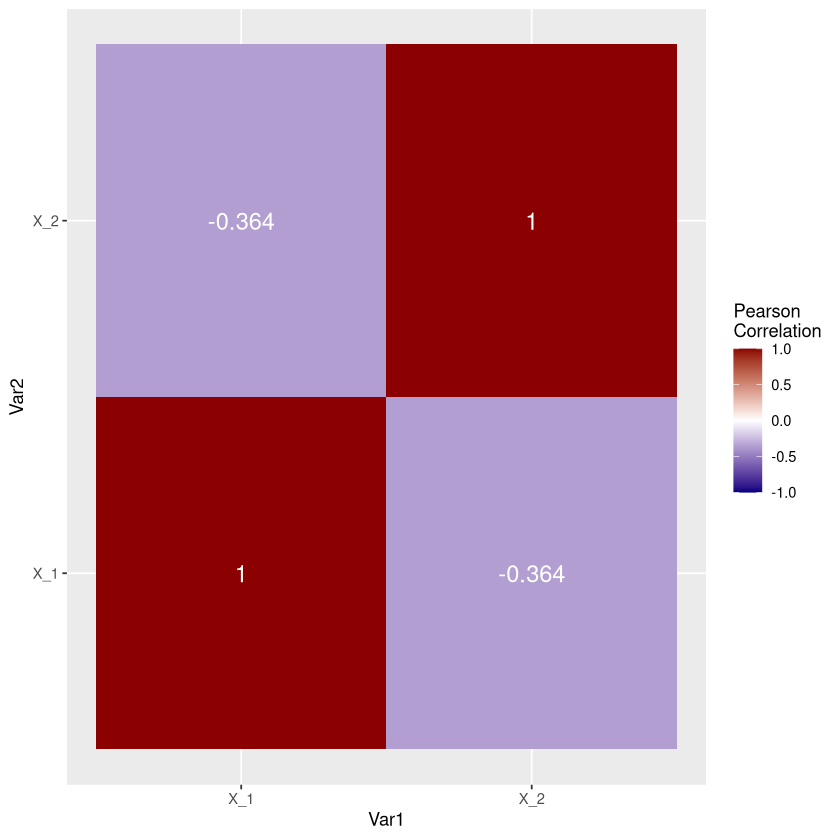

In [22]:
library(tidyr)
library(ggplot2)
X <- data.frame(
  X_1 = c(42, 52, 48, 58),
  X_2 = c(4, 5, 4, 3)
)
X_cor <- cor(X) |> reshape2::melt()

ggplot(
  data = X_cor,
  aes(
    x = Var1,
    y = Var2,
    fill = value
  )
) +
  geom_tile(color = 0) +
  scale_fill_gradient2(
    low = "navy",
    high = "red4",
    mid = "white",
    midpoint = 0,
    limit = c(-1, 1),
    space = "Lab",
    name = "Pearson\nCorrelation"
  ) +
  geom_text(
    aes(Var2, Var1,
      label = value |> round(3)
    ),
    color = "white", size = 5
  )

**Aplicaciones**

Una de las utilidades de la matriz de correlaciones la extracción de características (*feature extraction*). Si dos variables correlacionan entre sí, entonces una de ellas contiene información redundante, por lo que no es necesario ingresar ambas.

## 1.2. Visualización de datos multivariados

Existen diversas maneras para visualizar datos multivariados que dependen de los atributos de los datos. Por ejemplo, si son categóricos o variables continuas, o combinación de ambas.

Se van a ilustrar algunas maneras de realizar análisis exploratorio de datos y también cómo extraer información relevante a partir de la matriz de correlaciones.

Para lo anterior, debemos descargar primero un conjunto de datos multivariados, los datos de viviendas de distritos de California.

In [20]:
options(tidyverse.quiet = TRUE)
theme_set(theme_bw()) # fijar un tema para gráficos 
# cargar librería tidyverse
suppressPackageStartupMessages(library(tidyverse))
# leer datos de url
housing <- read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv",
  col_types = cols()
)
# ver la estructura de los datos
glimpse(housing)
head(housing)

Rows: 20,640
Columns: 10
$ longitude          <dbl> -122.23, -122.22, -122.24, -122.25, -122.25, -122.2…
$ latitude           <dbl> 37.88, 37.86, 37.85, 37.85, 37.85, 37.85, 37.84, 37…
$ housing_median_age <dbl> 41, 21, 52, 52, 52, 52, 52, 52, 42, 52, 52, 52, 52,…
$ total_rooms        <dbl> 880, 7099, 1467, 1274, 1627, 919, 2535, 3104, 2555,…
$ total_bedrooms     <dbl> 129, 1106, 190, 235, 280, 213, 489, 687, 665, 707, …
$ population         <dbl> 322, 2401, 496, 558, 565, 413, 1094, 1157, 1206, 15…
$ households         <dbl> 126, 1138, 177, 219, 259, 193, 514, 647, 595, 714, …
$ median_income      <dbl> 8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6…
$ median_house_value <dbl> 452600, 358500, 352100, 341300, 342200, 269700, 299…
$ ocean_proximity    <chr> "NEAR BAY", "NEAR BAY", "NEAR BAY", "NEAR BAY", "NE…


longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


De las 10 variables solo 9 son numéricas, `ocean_proximity` es categórica. Nos centramos en las primeras 9. Para visualizar rápidamente los datos los transformaremos a formato largo usando `pivot_longer`. Revisar [`esta`](https://nbviewer.org/github/jealcalat/Analisis_multivariado/blob/main/R_tutorials/data_wrangling_dplyr.ipynb) notebook para ver cómo.

In [23]:
# histogramas usando ggplot
housing <- housing |>
  # remover ocean_proximity
  select(-ocean_proximity)
housing_long <- housing |>  
  pivot_longer(
    cols = everything(),
    names_to = "variables",
    values_to = "values"
  )
head(housing_long)

variables,values
<chr>,<dbl>
longitude,-122.23
latitude,37.88
housing_median_age,41.00
total_rooms,880.00
total_bedrooms,129.00
population,322.00


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 207 rows containing non-finite values (stat_bin).”


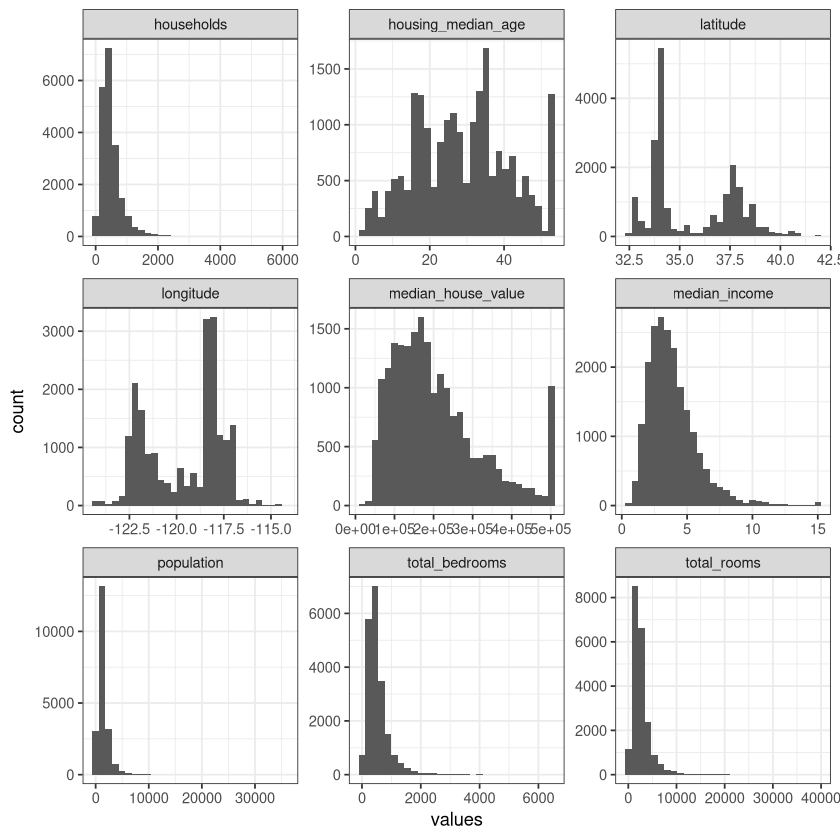

In [15]:
# ahora todos los valores numéricos están colapsados en 'values', y los nombres de las columnas en 'variables'
# podemos crear un histograma que tome 'values', y separarlos por variable usando facet_wrap
# creará un mosaico de 3x3
ggplot(
  housing_long,
  aes(x = values)
) +
  geom_histogram() +
  # para facilitar ver las variables en su propia escala, fijamos escala libre
  facet_wrap(~variables, scale = "free") +
  theme_bw()

1. Notar que los valores de ingreso mediano (`median_income`) no exceden el valor de 15. Así como está, no tenemos forma de saber qué representa. Los salarios fueron limitados entre 5 y 15, y representan diez miles (un valor de 3 es $ 30'000).
2. `median_house_value`, la variable de respuesta (o variable objetivo) también fue restringida a 500'000. Esto podría ser problemático si se quieren predecir el valor de una casa por encima de 500'000 pero un modelo no fue entrenado fuera de esos rangos.
3. Las variables tienen diferentes escalas.
4. Varias distribuciones tienen colas largas (tienen concentrados valores al inicio, luego se extienden a la derecha un rango muy largo).
5. Tres son multimodales.

Un objetivo posible de este conjunto de datos es predecir el valor de las casas a partir del resto de variables. Para ver cómo se relacionan las variables trataremos el problema como $\text{median\_house\_value } ~ \text{variable}_k$. Transformamos nuevamente usando `pivot_longer`.

In [17]:
# transformar los datos, dejando median_house_value como target
housing_long <- housing |>
  pivot_longer(
    cols = -median_house_value,
    names_to = "variables",
    values_to = "values"
  )
head(housing_long)

median_house_value,variables,values
<dbl>,<chr>,<dbl>
452600,longitude,-122.23
452600,latitude,37.88
452600,housing_median_age,41.00
452600,total_rooms,880.00
452600,total_bedrooms,129.00
452600,population,322.00


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 207 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 207 rows containing missing values (geom_point).”


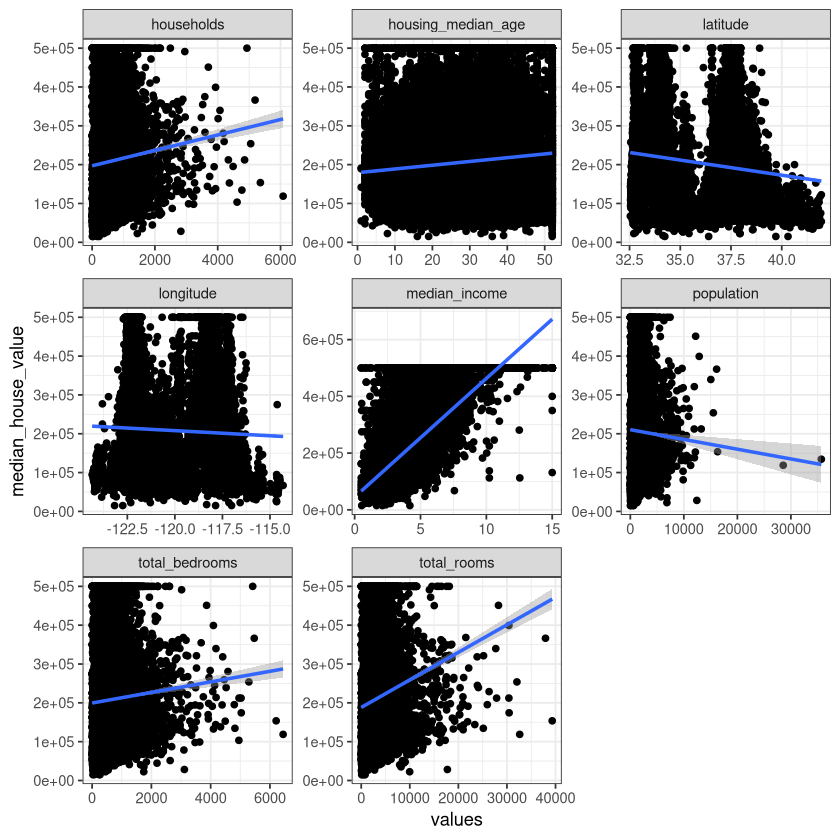

In [21]:
# grafico de dispersion
ggplot(
  housing_long,
  aes(x = values, y = median_house_value)
) +
  geom_point() +
  # añadir tendencia lineal
  geom_smooth(method = 'lm') +
  facet_wrap(~variables, scale = 'free')

Obtener la matriz de correlaciones para seleccionar los mejores predictores lineales.

In [48]:
# usamos solo observaciones completas, omitiendo NAs
housing_cor_mat <- housing |> cor(use = "complete.obs")
housing_cor_mat
# seleccionamos la columna median_house_value y ordenamos por correlación
housing_cor_mat |>
  # convertir a dataframe, dado que cor retorna matrix
  as.data.frame() |>
  select(median_house_value) |>
  arrange(desc(median_house_value))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00000000,-0.92461611,-0.10935655,0.04548017,0.06960802,0.100270301,0.05651277,-0.015550150,-0.04539822
latitude,-0.92461611,1.00000000,0.01189907,-0.03666681,-0.06698283,-0.108997344,-0.07177419,-0.079626319,-0.14463821
housing_median_age,-0.10935655,0.01189907,1.00000000,-0.36062830,-0.32045104,-0.295787297,-0.30276797,-0.118277723,0.10643205
total_rooms,0.04548017,-0.03666681,-0.36062830,1.00000000,0.93037950,0.857281251,0.91899153,0.197881519,0.13329413
total_bedrooms,0.06960802,-0.06698283,-0.32045104,0.93037950,1.00000000,0.877746743,0.97972827,-0.007722850,0.04968618
population,0.10027030,-0.10899734,-0.29578730,0.85728125,0.87774674,1.000000000,0.90718590,0.005086624,-0.02529973
households,0.05651277,-0.07177419,-0.30276797,0.91899153,0.97972827,0.907185900,1.00000000,0.013433892,0.06489355
median_income,-0.01555015,-0.07962632,-0.11827772,0.19788152,-0.00772285,0.005086624,0.01343389,1.000000000,0.68835548
median_house_value,-0.04539822,-0.14463821,0.10643205,0.13329413,0.04968618,-0.025299732,0.06489355,0.688355475,1.00000000


,median_house_value
,<dbl>
median_house_value,1.00000000
median_income,0.68835548
total_rooms,0.13329413
housing_median_age,0.10643205
households,0.06489355
total_bedrooms,0.04968618
population,-0.02529973
longitude,-0.04539822
latitude,-0.14463821


,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,longitude,longitude,1.00000000
2,latitude,longitude,-0.92461611
3,housing_median_age,longitude,-0.10935655
4,total_rooms,longitude,0.04548017
5,total_bedrooms,longitude,0.06960802
6,population,longitude,0.10027030


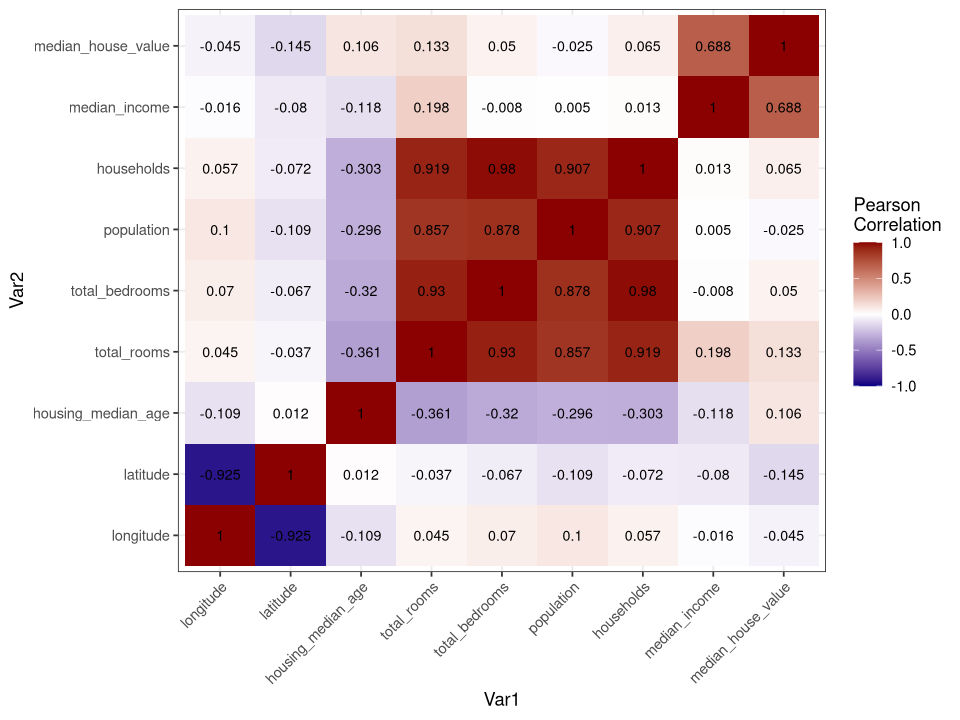

In [55]:
options(repr.plot.width=8, repr.plot.height=6)
housing_cor_mat2 <- housing_cor_mat |> reshape2::melt()
housing_cor_mat2 |> head()
ggplot(
  data = housing_cor_mat2,
  aes(
    x = Var1,
    y = Var2,
    fill = value
  )
) +
  geom_tile(color = 0) +
  scale_fill_gradient2(
    low = "navy",
    high = "red4",
    mid = "white",
    midpoint = 0,
    limit = c(-1, 1),
    space = "Lab",
    name = "Pearson\nCorrelation"
  ) +
  geom_text(
    aes(Var2, Var1,
      label = value |> round(3)
    ),
    color = "black", size = 3
  )+
  # rotar las etiquetas del eje x
  guides(x =  guide_axis(angle = 45)) 

Las variables con mejor predicción lineal son `median_income`, `total_rooms` y `housing_median_age`.

## Conclusión

Esta aplicación vista de la matriz de correlaciones es importante por sí misma, pero tanto la matriz de correlaciones como la matriz de covarianza contienen información que estaremos explotando en los siguientes temas.